In [1]:
import warnings; warnings.simplefilter('ignore')      
import numpy as np
import seaborn as sns

%matplotlib inline
# from scipy.stats import norm
from matplotlib import pyplot as plt
from tqdm import *

In [2]:
df_tvpi = pd.read_csv('df_tvpi.csv')
tvpi = df_tvpi.loc[:,['Company name','filing_date','last_name','first_name','TVPI']]

In [3]:
df2 = pd.read_csv('df2.csv')
del df2['Unnamed: 0']

In [4]:
data = pd.merge(df2,tvpi,on=['Company name','filing_date','last_name','first_name'],how='left')

In [5]:
data

,Company name,filing_date,total_shares,round_shares,rounds,first_name,last_name,number_of_shares,percent_total,Deal date,...,v3/v2,v4/v3,follow_count,rate,industry_val,male_ratio,label,industry_1,industry_2,TVPI
0,ATEEDA,2013-06-30,2.739548e+05,2.739548e+05,1,JOHN COLIN,ADAMS,559.0,0.204,2012-05-24,...,1.000000,1.000000,0,1.00,NaN,0.5,1,UNKNOWN,0,NaN
1,ATEEDA,2014-06-30,3.597177e+05,8.576293e+04,2,JOHN COLIN,ADAMS,1702.0,0.473,2014-05-31,...,1.000000,1.000000,1,1.00,NaN,0.5,1,UNKNOWN,0,NaN
2,ATEEDA,2015-06-30,3.469110e+05,-1.280670e+04,3,JOHN COLIN,ADAMS,1702.0,0.491,2014-05-31,...,-16.043576,1.000000,1,0.83,NaN,0.5,0,UNKNOWN,0,NaN
3,ATEEDA,2016-06-30,4.297006e+05,8.278960e+04,4,JOHN COLIN,ADAMS,3082.0,0.717,2015-11-19,...,-16.043576,1.985387,2,0.32,NaN,0.5,1,UNKNOWN,0,0.0
4,ATEEDA,2013-06-30,2.739548e+05,2.739548e+05,1,MICHAEL JAMES,ANDREW,720.0,0.263,2012-05-24,...,1.000000,1.000000,0,1.00,NaN,0.5,1,UNKNOWN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8440,tootle,2017-12-04,7.070543e+06,3.639250e+05,3,NINUO,ZHAO,12500.0,0.177,2017-09-27,...,11.975207,1.000000,1,0.98,NaN,0.5,0,UNKNOWN,0,0.0
8441,tootle,2018-12-04,8.217117e+06,1.146574e+06,4,NUNUO,ZHAO,12500.0,0.152,2018-06-25,...,11.975207,0.500539,0,0.05,NaN,0.5,1,UNKNOWN,0,0.0
8442,tootle,2017-11-24,6.706618e+06,3.328239e+06,2,HEYKEL,ZOUITEN,9121.0,0.136,2017-09-27,...,1.000000,1.000000,0,1.00,NaN,0.5,1,UNKNOWN,0,NaN
8443,tootle,2017-12-04,7.070543e+06,3.639250e+05,3,HEYKEL,ZOUITEN,9121.0,0.129,2017-09-27,...,11.975207,1.000000,0,0.98,NaN,0.5,0,UNKNOWN,0,NaN


In [6]:
df_tvpi

,Unnamed: 0,Company name,filing_date,total_shares,round_shares,rounds,first_name,last_name,number_of_shares,percent_total,...,follow,valuation,first_industry,v2/v1,v3/v2,v4/v3,paid_in,follow_count,total_value,TVPI
0,3,ATEEDA,2016-06-30,4.297006e+05,8.278960e+04,4,JOHN COLIN,ADAMS,3082.0,0.717,...,1,7.247142,NaN,2.395736,-16.043576,1.985387,22037.090736,2,0.0,0.0
1,7,ATEEDA,2016-06-30,4.297006e+05,8.278960e+04,4,MICHAEL JAMES,ANDREW,720.0,0.168,...,0,7.247142,NaN,2.395736,-16.043576,1.985387,2628.173757,0,0.0,0.0
2,11,ATEEDA,2016-06-30,4.297006e+05,8.278960e+04,4,ANJA MARIA,BALFOUR,1143.0,0.266,...,0,7.247142,NaN,2.395736,-16.043576,1.985387,5624.235837,1,0.0,0.0
3,18,ATEEDA,2016-06-30,4.297006e+05,8.278960e+04,4,GEOFFREY ARTHUR,BALL,3370.0,0.784,...,0,7.247142,NaN,2.395736,-16.043576,1.985387,-197357.054589,0,0.0,-0.0
4,19,ATEEDA,2016-06-30,4.297006e+05,8.278960e+04,4,MARY ELIZABETH,BALL,5741.0,1.336,...,1,7.247142,NaN,2.395736,-16.043576,1.985387,41605.841072,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,9385,tootle,2018-12-04,8.217117e+06,1.146574e+06,4,ANDREW,WYKE,125000.0,1.516,...,0,0.152556,NaN,1.309424,11.975207,0.500539,42813.307723,1,0.0,0.0
3609,9388,tootle,2018-12-04,8.217117e+06,1.146574e+06,4,FRANCESCA,YARDLEY,25000.0,0.303,...,0,0.152556,NaN,1.309424,11.975207,0.500539,9977.272461,0,0.0,0.0
3610,9391,tootle,2017-12-04,7.070543e+06,3.639250e+05,3,NINUO,ZHAO,12500.0,0.177,...,0,3.649846,NaN,1.309424,11.975207,NaN,4517.099258,1,0.0,0.0
3611,9392,tootle,2018-12-04,8.217117e+06,1.146574e+06,4,NUNUO,ZHAO,12500.0,0.152,...,1,0.152556,NaN,1.309424,11.975207,0.500539,1906.952000,0,0.0,0.0


In [7]:
high_tvpi = df_tvpi.loc[df_tvpi['TVPI']>0]

In [8]:
high_tvpi

,Unnamed: 0,Company name,filing_date,total_shares,round_shares,rounds,first_name,last_name,number_of_shares,percent_total,...,follow,valuation,first_industry,v2/v1,v3/v2,v4/v3,paid_in,follow_count,total_value,TVPI
1182,2956,Feedr,2020-01-30,3.143587e+06,3.512388e+03,4,MICHAEL,ALLEN,18622.0,0.592,...,0,289.835327,Administrative Services,1.000000,2.737564,954.723814,1.547619e+04,0,1.125523e+05,7.272611
1183,2957,Feedr,2018-01-30,1.915131e+06,1.913991e+06,2,DIL,AMIN,6568.0,0.343,...,1,0.303580,Administrative Services,1.000000,NaN,NaN,1.993915e+03,0,3.969733e+04,19.909235
1184,2961,Feedr,2020-01-30,3.143587e+06,3.512388e+03,4,DILESH,AMIN,6568.0,0.209,...,1,289.835327,Administrative Services,1.000000,2.737564,954.723814,1.903638e+06,0,3.969733e+04,0.020853
1185,2962,Feedr,2020-01-30,3.143587e+06,3.512388e+03,4,VISHAL,AMIN,26275.0,0.836,...,1,289.835327,Administrative Services,1.000000,2.737564,954.723814,7.615423e+06,0,1.588074e+05,0.020853
1186,2964,Feedr,2020-01-30,3.143587e+06,3.512388e+03,4,JAMES,BAKER,2865.0,0.091,...,0,289.835327,Administrative Services,1.000000,2.737564,954.723814,2.381016e+03,0,1.731621e+04,7.272611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,6821,Skyscanner,2019-09-30,9.435441e+08,4.450680e+06,4,NaN,CTRIP.COM INTERNATIONAL LTD,910372005.0,96.494,...,0,8.619564,Internet Services,0.011303,4.146397,2.351854,6.331498e+07,1,1.350780e+09,21.334292
2661,6822,Skyscanner,2016-10-14,1.046735e+07,1.046735e+07,1,NaN,DETAILS WILL BE PROVIDED IN PAPER FORM,5127432.0,48.985,...,1,3.665007,Internet Services,NaN,NaN,NaN,1.879208e+07,0,7.607916e+06,0.404847
2662,6824,Skyscanner,2019-09-30,9.435441e+08,4.450680e+06,4,NaN,SOLIUM CAPITAL UK LIMITED,832750.0,0.088,...,1,8.619564,Internet Services,0.011303,4.146397,2.351854,1.176952e+07,1,1.235607e+06,0.104984
2663,6825,Skyscanner,2019-09-30,9.435441e+08,4.450680e+06,4,NaN,SOLIUM TRUSTEE (UK) LIMITED,1732222.0,0.184,...,1,8.619564,Internet Services,0.011303,4.146397,2.351854,1.493100e+07,0,2.570214e+06,0.172139


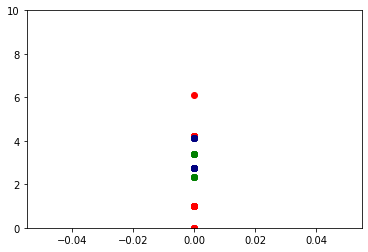

In [9]:
x = np.zeros(61)
y1 = np.array(high_tvpi['v2/v1'])
y2 = np.array(high_tvpi['v3/v2'])
y3 = np.array(high_tvpi['v4/v3'])
plt.scatter(x,y1,color='r')
plt.scatter(x,y2,color='navy')
plt.scatter(x,y3,color='green')
plt.ylim(0,10)
plt.show()

<AxesSubplot:ylabel='Density'>

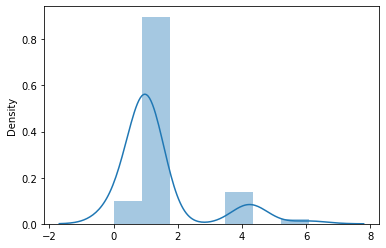

In [10]:
sns.distplot(y1)

<AxesSubplot:ylabel='Density'>

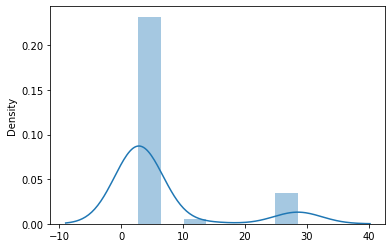

In [11]:
sns.distplot(y2)

<AxesSubplot:ylabel='Density'>

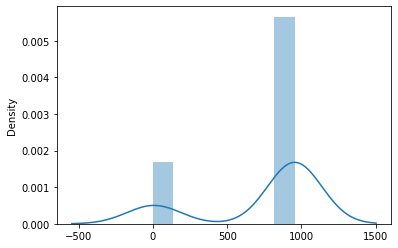

In [12]:
sns.distplot(y3)

In [14]:
y11 = y1[y1<10]
y22 = y2[y2<10]
y33 = y3[y3<10]

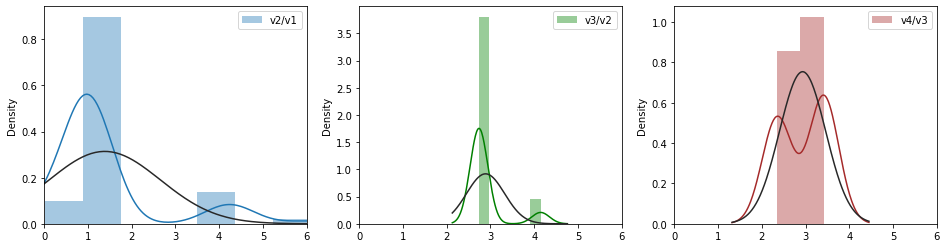

In [61]:
from scipy.stats import *
plt.style.use({'figure.figsize':(16, 4)})

fig,axes=plt.subplots(1,3)


fig1 = sns.distplot(y11,fit=norm,label='v2/v1',ax=axes[0])
fig2 = sns.distplot(y22,fit=norm,label='v3/v2',color='green',ax=axes[1])
fig3 = sns.distplot(y33,fit=norm,label='v4/v3',color='brown',ax=axes[2])
fig1.legend()
fig1.set(xlim=(0, 6))
fig2.legend()
fig2.set(xlim=(0, 6))
fig3.legend()
fig3.set(xlim=(0, 6))

plt.show()